# 4. Exploratory Data Analysis (EDA)
- **Data 그 자체**만으로부터 인사이트를 얻어내는 접근법! ex)통계적으로, 시각화

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적(명확)과 변수 확인(Column)
2. 데이터 전체적으로 살펴보기(상관관계, NaN)
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
titanic = pd.read_csv("../data/titanic/train.csv")

## 1. 분석의 목적과 변수 확인
- 어떤사람들이 살았을까

In [4]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## 각 Column Data type 확인

titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [6]:
## Data 전체 정보를 얻는 함수 : .describe()

titanic.describe() # 수치형 데이터에 대한 요약만을 제공

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
## 상관계수 확인

titanic.corr()
# Correlatoin is NOT causation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
## 결측치 확인

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

In [9]:
## 생존자, 사망자 Check

titanic["Survived"].sum()

titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

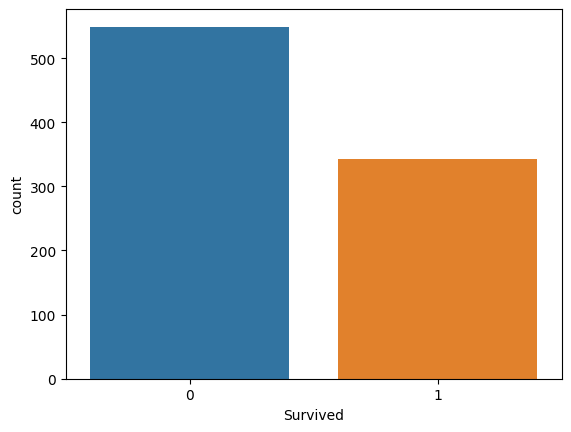

In [10]:
## 생존자수와 사망자수 그려보기 sns.countplot()

sns.countplot(x='Survived', data=titanic)
plt.show()

In [11]:
## Pclass 에 따른 인원 파악

titanic[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
# 생존자 인원

titanic[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [13]:
# 생존 비율

titanic[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

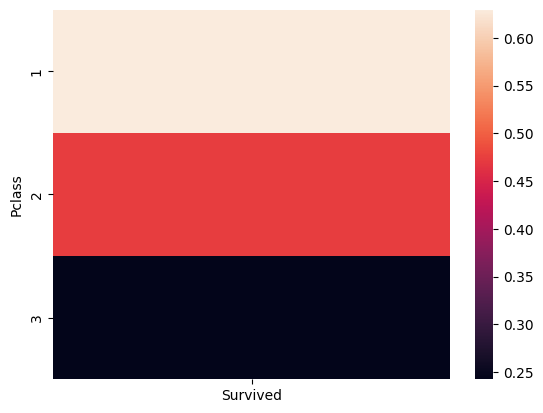

In [14]:
# 히트맵 활용

sns.heatmap(titanic[['Pclass','Survived']].groupby(['Pclass']).mean())
plt.plot()

In [15]:
# Sex
titanic.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

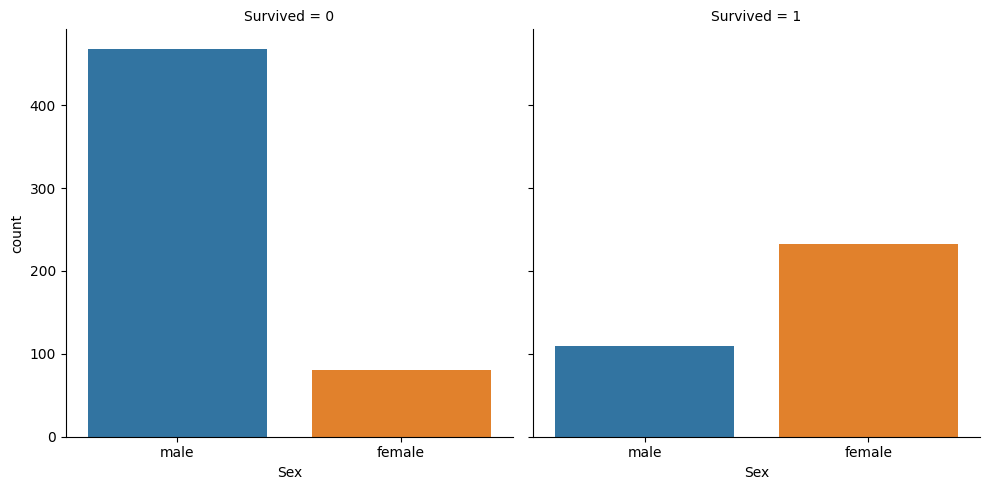

In [16]:
# sns.catplot 사용

sns.catplot(x='Sex',col='Survived', kind='count', data=titanic)
plt.show()

In [17]:
# Age
# 결측치 존재 유의

titanic.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

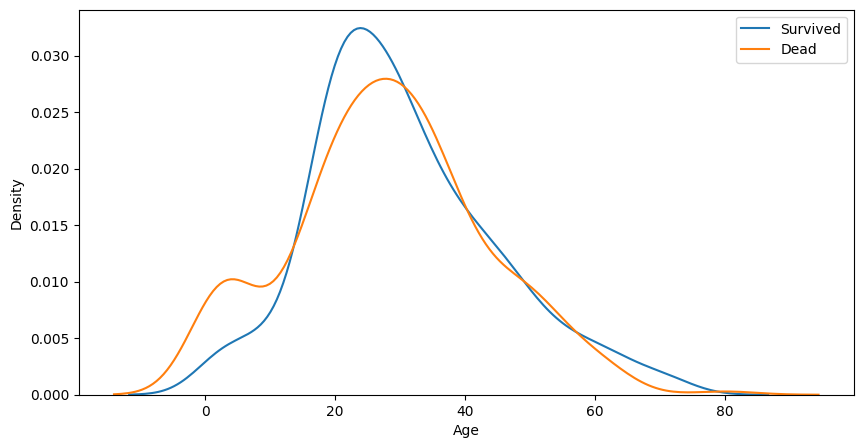

In [18]:
## Survived 1, 0과 Age의 경향성

fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x=titanic[titanic['Survived'] == 0]['Age'], ax=ax)
sns.kdeplot(x=titanic[titanic.Survived == 1]['Age'], ax=ax)

plt.legend(['Survived','Dead'])

plt.show()

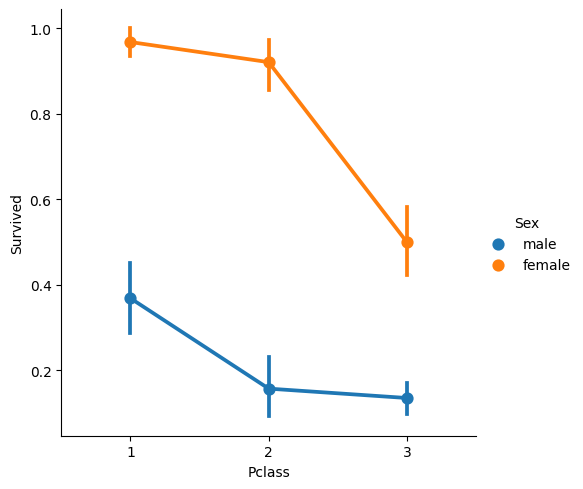

In [19]:
# Sex + Pclass vs Survived

sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic)
plt.show()

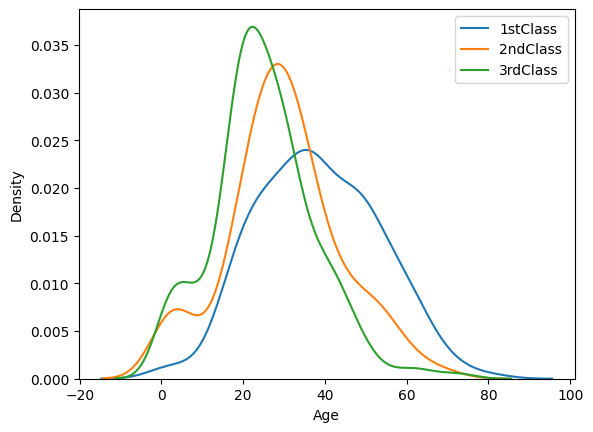

In [20]:
# Age + Pclass

# scipy가 있어야함
# titanic['Age'][titanic['Pclass']==1].plot(kind='kde')
# titanic['Age'][titanic['Pclass']==2].plot(kind='kde')
# titanic['Age'][titanic['Pclass']==3].plot(kind='kde')

# fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x=titanic['Age'][titanic['Pclass']==1])
sns.kdeplot(x=titanic['Age'][titanic['Pclass']==2])
sns.kdeplot(x=titanic['Age'][titanic['Pclass']==3])

plt.legend(['1stClass','2ndClass','3rdClass'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

In [21]:
titanic[['SibSp','Survived']].groupby(['SibSp']).count()

,Survived
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


In [22]:
titanic.groupby(['Survived','SibSp'])['Survived'].count()

Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: Survived, dtype: int64

In [23]:
titanic[['SibSp','Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


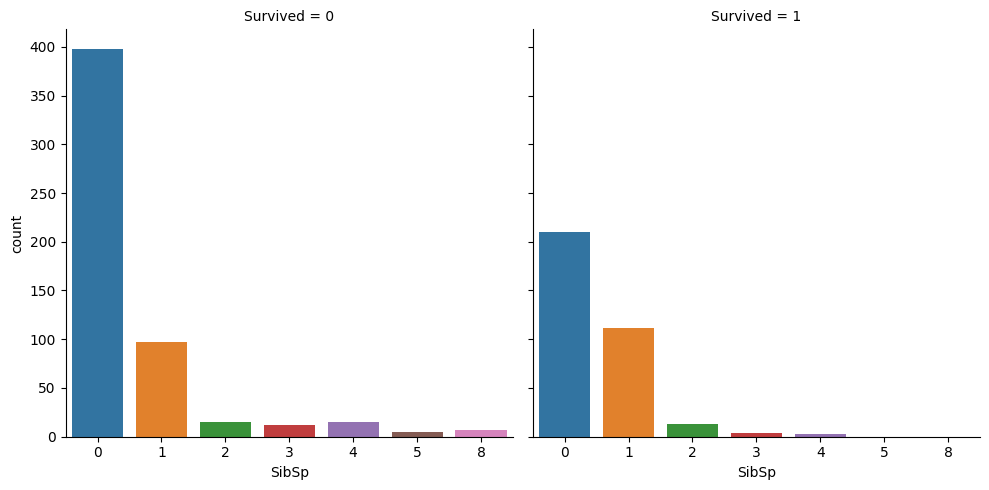

In [24]:
sns.catplot(x='SibSp',col='Survived', kind='count', data=titanic)
plt.show()

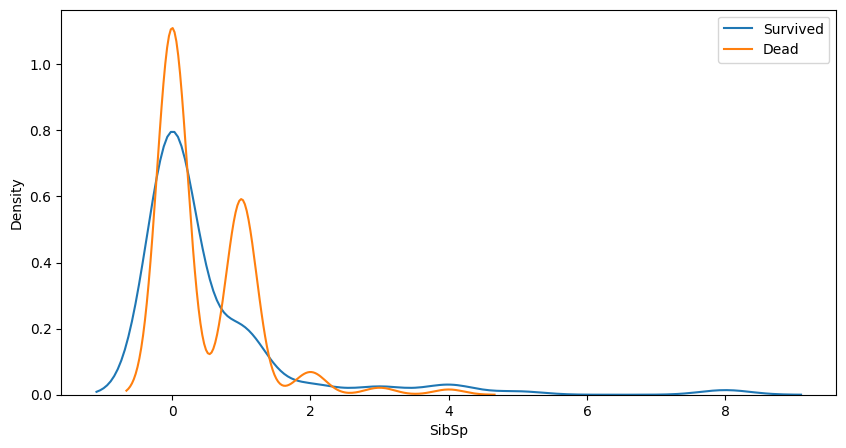

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x=titanic[titanic['Survived'] == 0]['SibSp'], ax=ax)
sns.kdeplot(x=titanic[titanic.Survived == 1]['SibSp'], ax=ax)

plt.legend(['Survived','Dead'])

plt.show()

- SibSp값을 봤을 때 생존자는 SibSP값이 0일때 가장 많지만 비율로 봤을 때는 Sib 값이 1~2일때 가장 확률이 높았다.
- SibSp값이 5이상이면 살아남은 사람이 아예 없는 것을 볼 수 있었다.


### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

### Fastfood 영양 데이터를 알아보기

- https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition

In [26]:
fastfood = pd.read_csv('../data/fastfood/fastfood.csv')

fastfood.head(5)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


- Fastfood 가게 종류, 메뉴, 칼로리, 지방칼로리, 총지방량, 포화지방, 트렌스지방, 콜레스테롤, 염분, 총 탄수화물량, 섬유질, 당분, 단백질, 비타민A, 비타민C 칼슘 으로 이루어져있다.
- salad는 필요없는 수치

## Tasks
- 가게와 영양성분의 상관관계를 알아보기
1. 가게별로 메뉴가 몇 개 있는지 알아보기
2. 칼로리를 덜 섭취하고 싶을 때 어디서 먹는게 제일 좋은지
3. 단백질을 잘 섭취하고 싶을 때 어디서 먹는게 제일 좋은지
4. 탄수화물을 섭취해야하는데 단당류 비율이 적은 복합탄수화물이 먹고싶을 때

In [27]:
#결측치 알아보기

fastfood.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

- 비타민, 칼슘량, 섬유질양에 대해서 결측치가 있음
- 단백질 결측치는 단 1개이지만 중요한 수치니깐 고려해보자

In [28]:
fastfood.corr()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
calories,1.000000,0.901661,0.900494,0.739664,0.530354,0.762460,0.817855,0.712701,0.287031,0.437711,0.831957,-0.153963,0.007387,0.351207
cal_fat,0.901661,1.000000,0.995311,0.852150,0.648422,0.803997,0.670458,0.419373,0.032643,0.255485,0.720379,-0.121748,-0.115456,0.166801
total_fat,0.900494,0.995311,1.000000,0.846716,0.648821,0.801352,0.669182,0.422543,0.036386,0.259370,0.719518,-0.122280,-0.112868,0.168817
sat_fat,0.739664,0.852150,0.846716,1.000000,0.812126,0.764030,0.487456,0.276534,-0.041220,0.234218,0.603645,-0.054292,-0.088834,0.304948
trans_fat,0.530354,0.648422,0.648821,0.812126,1.000000,0.680858,0.261466,0.100284,-0.121890,0.112651,0.478960,-0.086352,-0.141754,0.114094
cholesterol,0.762460,0.803997,0.801352,0.764030,0.680858,1.000000,0.596164,0.238728,-0.061503,0.298259,0.880960,-0.057142,-0.015610,0.162438
sodium,0.817855,0.670458,0.669182,0.487456,0.261466,0.596164,1.000000,0.671976,0.301023,0.422993,0.766942,-0.134031,0.062994,0.284882
total_carb,0.712701,0.419373,0.422543,0.276534,0.100284,0.238728,0.671976,1.000000,0.648839,0.547026,0.474396,-0.187004,0.128177,0.514463
fiber,0.287031,0.032643,0.036386,-0.041220,-0.121890,-0.061503,0.301023,0.648839,1.000000,0.236475,0.148053,0.157631,0.491224,0.546734
sugar,0.437711,0.255485,0.259370,0.234218,0.112651,0.298259,0.422993,0.547026,0.236475,1.000000,0.389959,0.001626,0.229223,0.310559


- 상관관계를 봤을 때 지방과 칼로리의 관계가 눈에 띈다.
- 염분과 단백질 또한 칼로리와 연관성이 있어보인다.

In [29]:
fastfood.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


## 가게별로 메뉴가 몇 개 있는지 알아보기

In [30]:
fastfood['restaurant'].value_counts()

Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: restaurant, dtype: int64

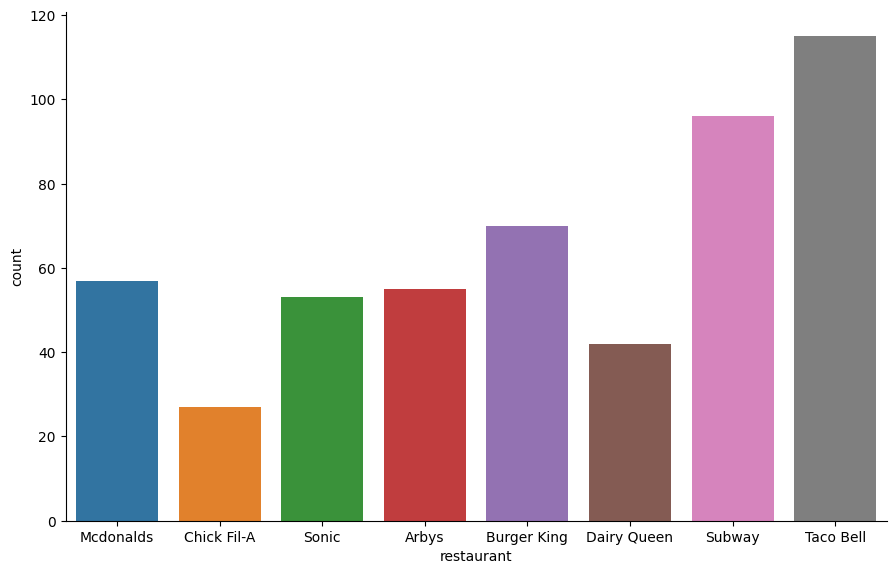

In [31]:
fig = sns.catplot(x='restaurant', kind='count', data=fastfood)
fig.fig.set_size_inches(10,6)
plt.show()

- 다채롭게 먹고싶으면 타코벨로 가자

## 칼로리를 덜 섭취하고 싶을 때 어디서 먹는게 제일 좋은지

In [32]:
# 식당에서 칼로리의 평균값을 구해보기

cal_mean_res = fastfood[['calories','restaurant']].groupby(['restaurant']).mean()

cal_mean_res

,calories
restaurant,
Arbys,532.727273
Burger King,608.571429
Chick Fil-A,384.444444
Dairy Queen,520.238095
Mcdonalds,640.350877
Sonic,631.698113
Subway,503.020833
Taco Bell,443.652174


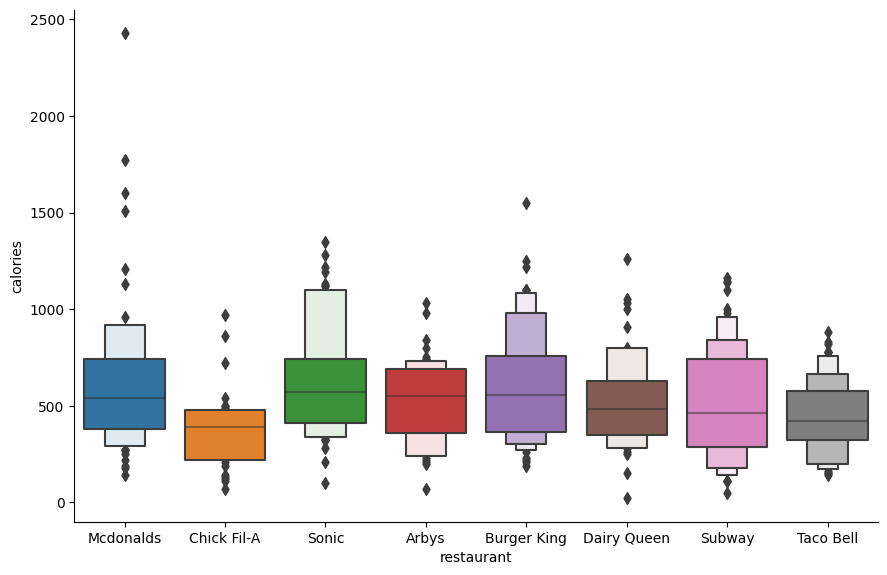

In [33]:
fig = sns.catplot(x='restaurant', y='calories', kind="boxen",data=fastfood)
fig.fig.set_size_inches(10,6)
plt.show()

- Chick Fil-A라는 곳이 칼로리가 낮은 것을 알 수 있음
- 타코벨이 주변에 있으면 한국에서는 좋은 선택이 될 것 같음

## 단백질을 잘 섭취하고 싶을 때 어디서 먹는게 제일 좋은지


In [34]:
# 단백질의 결손치가 있었는데 결손치가 나온 식당을 찾아보기

fastfood['restaurant'][fastfood['protein'].isnull()]

205    Burger King
Name: restaurant, dtype: object

In [35]:
# Buger King의 protein mean값을 넣어주기
protein_mean_buggerking = fastfood['protein'][fastfood['restaurant']=='Burger King'].mean()

fastfood[fastfood['protein'].isnull()].fillna(protein_mean_buggerking)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
205,Burger King,Farmhouse King,1220,720,80,28.0,3.0,335,2050,62,30.014493,15,30.014493,30.014493,30.014493,30.014493,Other


In [36]:
# 식당에서 단백질의 평균값을 구해보기

prot_mean_res = fastfood[['protein','restaurant']].groupby(['restaurant']).mean()

prot_mean_res

,protein
restaurant,
Arbys,29.254545
Burger King,30.014493
Chick Fil-A,31.703704
Dairy Queen,24.833333
Mcdonalds,40.298246
Sonic,29.188679
Subway,30.312500
Taco Bell,17.417391


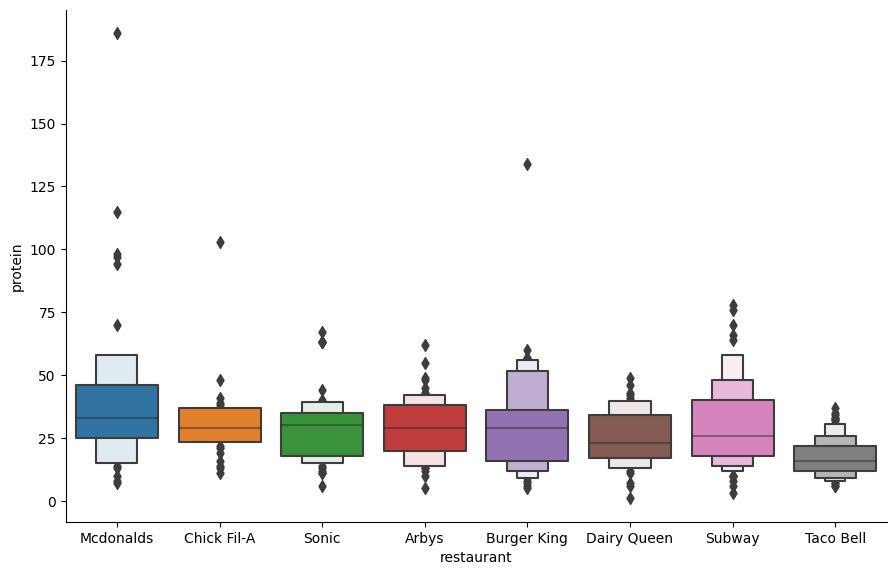

In [37]:
fig = sns.catplot(x='restaurant', y='protein', kind="boxen",data=fastfood)
fig.fig.set_size_inches(10,6)
plt.show()

- 단백질 평균값은 맥도날드가 높긴하다
- 하지만 칼로리를 생각했을 때 맥도날드의 제품을 골라야하는가 생각이듬
    - 위의 문제를 해결하기위해 성분들의 평균을 넣어 각 제품마다 영양성분비율의 Pie Chart 생각 가능
- 타코벨을 제외한 제품들의 단백질 평균은 비슷
- 하지만 박스를 비교해서 서브웨이가 단백질 함량 제품이 많은 것을 알 수 있음

## 탄수화물을 섭취해야하는데 단당류 비율이 적은 복합탄수화물이 먹고싶을 때

In [38]:
# total_carb / sugar 의 비율이 중요하다.

rate_carb_mean_res = fastfood[['total_carb','sugar','restaurant']].groupby(['restaurant']).mean()

rate_carb_mean_res

,total_carb,sugar
restaurant,,
Arbys,44.872727,7.563636
Burger King,39.314286,8.185714
Chick Fil-A,28.629630,4.148148
Dairy Queen,38.690476,6.357143
Mcdonalds,48.789474,11.070175
Sonic,47.207547,6.528302
Subway,54.718750,10.093750
Taco Bell,46.634783,3.704348


In [39]:
# column 추가

rate_carb_mean_res['rateCarb'] = rate_carb_mean_res['total_carb'] /  rate_carb_mean_res['sugar']

rate_carb_mean_res

,total_carb,sugar,rateCarb
restaurant,,,
Arbys,44.872727,7.563636,5.932692
Burger King,39.314286,8.185714,4.802792
Chick Fil-A,28.629630,4.148148,6.901786
Dairy Queen,38.690476,6.357143,6.086142
Mcdonalds,48.789474,11.070175,4.407290
Sonic,47.207547,6.528302,7.231214
Subway,54.718750,10.093750,5.421053
Taco Bell,46.634783,3.704348,12.589202


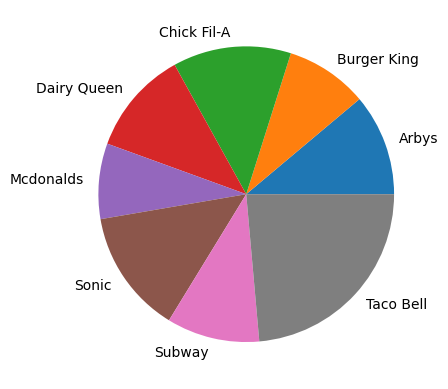

In [40]:
plt.pie(rate_carb_mean_res['rateCarb'], labels=rate_carb_mean_res.index)

plt.show()

- 타코벨이 압도적으로 단당류가 적어서 복합 탄수화물 섭취에 용이한 것을 알 수 있다